# Pokedex
The Pokedex notebook is the ultimate tool for any Pokemon enthusiast, providing a deep dive into the world of Pokemon. With this notebook, you can easily explore and analyze your favorite Pokemon, or multiple Pokemon at once, to gain a comprehensive understanding of their abilities, strengths, and weaknesses.

Whether you're a seasoned trainer or a new player, the Pokedex notebook is the perfect companion for your Pokemon journey. With its user-friendly interface and vast array of data, you can quickly access information on a wide range of Pokemon, from their physical characteristics to their moves and abilities.

So if you're looking to take your Pokemon knowledge to the next level, look no further than the Pokedex notebook. It's the ultimate resource for all your Pokemon needs, and with it, you'll be well on your way to becoming the best trainer around!

In [1]:
import os
import numpy   as np 
import pandas  as pd 
import seaborn as sns
from matplotlib import pyplot as plt 
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from tabulate import tabulate
from collections import Counter

In [2]:
data = pd.read_csv("C:/Users/suman/Desktop/GitHub Repo/Projects/To do/Pokemon/pokemon.csv")

pd.set_option('display.max_row',data.shape[0])
pd.set_option('display.max_column',data.shape[1]) 
data.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,Fushigisouフシギソウ,Ivysaur,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,Fushigibanaフシギバナ,Venusaur,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,Hitokageヒトカゲ,Charmander,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,Lizardoリザード,Charmeleon,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [3]:
data.sample(5).T

,525,770,280,282,231
abilities,"['Sturdy', 'Sand Stream', 'Sand Force']","['Innards Out', 'Unaware']","['Synchronize', 'Trace', 'Telepathy']","['Swift Swim', 'Rain Dish']","['Sturdy', 'Sand Veil']"
against_bug,1.0,1.0,1.0,1.0,1.0
against_dark,1.0,1.0,1.0,1.0,1.0
against_dragon,1.0,1.0,0.0,1.0,1.0
against_electric,1.0,2.0,1.0,2.0,0.0
against_fairy,1.0,1.0,1.0,1.0,1.0
against_fight,2.0,1.0,0.25,0.5,1.0
against_fire,0.5,0.5,1.0,1.0,1.0
against_flying,0.5,1.0,1.0,2.0,1.0
against_ghost,1.0,1.0,2.0,1.0,1.0


In [4]:
for i in ['generation','type1','type2']:
    print("{} => {}".format(i,data[i].unique()))

generation => [1 2 3 4 5 6 7]
type1 => ['grass' 'fire' 'water' 'bug' 'normal' 'poison' 'electric' 'ground'
 'fairy' 'fighting' 'psychic' 'rock' 'ghost' 'ice' 'dragon' 'dark' 'steel'
 'flying']
type2 => ['poison' nan 'flying' 'dark' 'electric' 'ice' 'ground' 'fairy' 'grass'
 'fighting' 'psychic' 'steel' 'fire' 'rock' 'water' 'dragon' 'ghost' 'bug'
 'normal']


In [5]:
data.isnull().sum()

abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m              20
hp                     0
japanese_name          0
name                   0
percentage_male       98
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg             20
generation             0


In [6]:
data['type2'].fillna('None', inplace=True)
data['percentage_male'].fillna('None', inplace=True)
data['height_m'].fillna(data['height_m'].mean(), inplace=True)
data['weight_kg'].fillna(data['weight_kg'].mean(), inplace=True)
data.insert(0, 'name', data.pop('name'))
data.isnull().sum()

name                 0
abilities            0
against_bug          0
against_dark         0
against_dragon       0
against_electric     0
against_fairy        0
against_fight        0
against_fire         0
against_flying       0
against_ghost        0
against_grass        0
against_ground       0
against_ice          0
against_normal       0
against_poison       0
against_psychic      0
against_rock         0
against_steel        0
against_water        0
attack               0
base_egg_steps       0
base_happiness       0
base_total           0
capture_rate         0
classfication        0
defense              0
experience_growth    0
height_m             0
hp                   0
japanese_name        0
percentage_male      0
pokedex_number       0
sp_attack            0
sp_defense           0
speed                0
type1                0
type2                0
weight_kg            0
generation           0
is_legendary         0
dtype: int64

In [7]:
for i in data.capture_rate:
    print(i,end=", ")

45, 45, 45, 45, 45, 45, 45, 45, 45, 255, 120, 45, 255, 120, 45, 255, 120, 45, 255, 127, 255, 90, 255, 90, 190, 75, 255, 90, 235, 120, 45, 235, 120, 45, 150, 25, 190, 75, 170, 50, 255, 90, 255, 120, 45, 190, 75, 190, 75, 255, 50, 255, 90, 190, 75, 190, 75, 190, 75, 255, 120, 45, 200, 100, 50, 180, 90, 45, 255, 120, 45, 190, 60, 255, 120, 45, 190, 60, 190, 75, 190, 60, 45, 190, 45, 190, 75, 190, 75, 190, 60, 190, 90, 45, 45, 190, 75, 225, 60, 190, 60, 90, 45, 190, 75, 45, 45, 45, 190, 60, 120, 60, 30, 45, 45, 225, 75, 225, 60, 225, 60, 45, 45, 45, 45, 45, 45, 45, 255, 45, 45, 35, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 25, 3, 3, 3, 45, 45, 45, 3, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 255, 90, 255, 90, 255, 90, 255, 90, 90, 190, 75, 190, 150, 170, 190, 75, 190, 75, 235, 120, 45, 45, 190, 75, 65, 45, 255, 120, 45, 45, 235, 120, 75, 255, 90, 45, 45, 30, 70, 45, 225, 45, 60, 190, 75, 190, 60, 25, 190, 75, 45, 25, 190, 45, 60, 120, 60, 190, 75, 225, 75, 60, 190, 75, 45, 25, 25, 120, 45, 45,

This code block is a powerful tool for any Pokemon trainer looking to gain a competitive edge. By inputting the opponent's Pokemon type, the code retrieves data on Pokemon with the highest and lowest attack values against that type, as well as their corresponding types. 

The tabulate function is used to display the results in a clear and organized format, making it easy to compare and analyze the data. Additionally, the code generates bar graphs that display the types of Pokemon that are strongest or weakest against the opponent's type, allowing trainers to better strategize their battles.

Overall, this code block is an excellent resource for trainers looking to gain a deeper understanding of the strengths and weaknesses of different Pokemon types, and how to effectively counter their opponents.

Enter the opponent pokemon type: Bulbasaur
Pokemon that is strongest against Bulbasaur type
+-----+-----------+---------------+---------+---------+
|     | name      |   against_bug | type1   | type2   |
|-----+-----------+---------------+---------+---------|
| 101 | Exeggcute |             4 | grass   | psychic |
| 102 | Exeggutor |             4 | grass   | psychic |
| 250 | Celebi    |             4 | psychic | grass   |
| 273 | Nuzleaf   |             4 | grass   | dark    |
| 274 | Shiftry   |             4 | grass   | dark    |
| 331 | Cacturne  |             4 | grass   | dark    |
| 685 | Inkay     |             4 | dark    | psychic |
| 686 | Malamar   |             4 | dark    | psychic |
+-----+-----------+---------------+---------+---------+
Pokemon that is weakest against Bulbasaur type
+-----+-------------+---------------+----------+----------+
|     | name        |   against_bug | type1    | type2    |
|-----+-------------+---------------+----------+----------|
|   5 | C

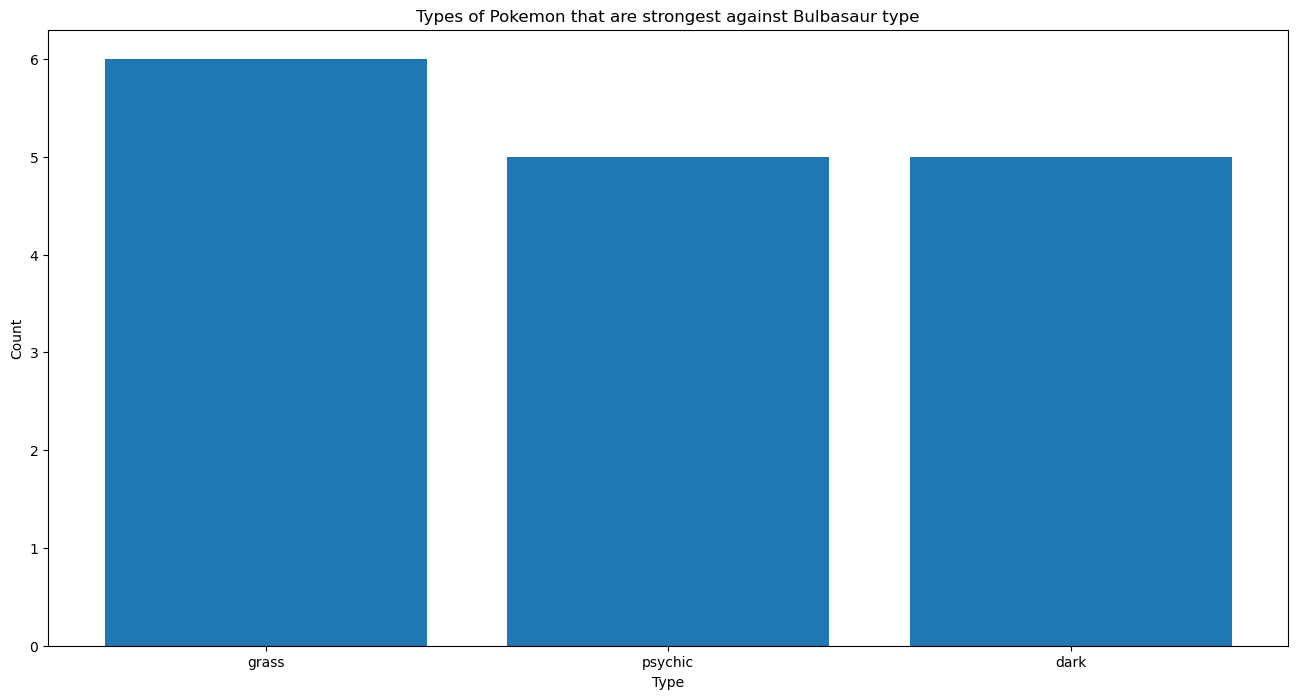

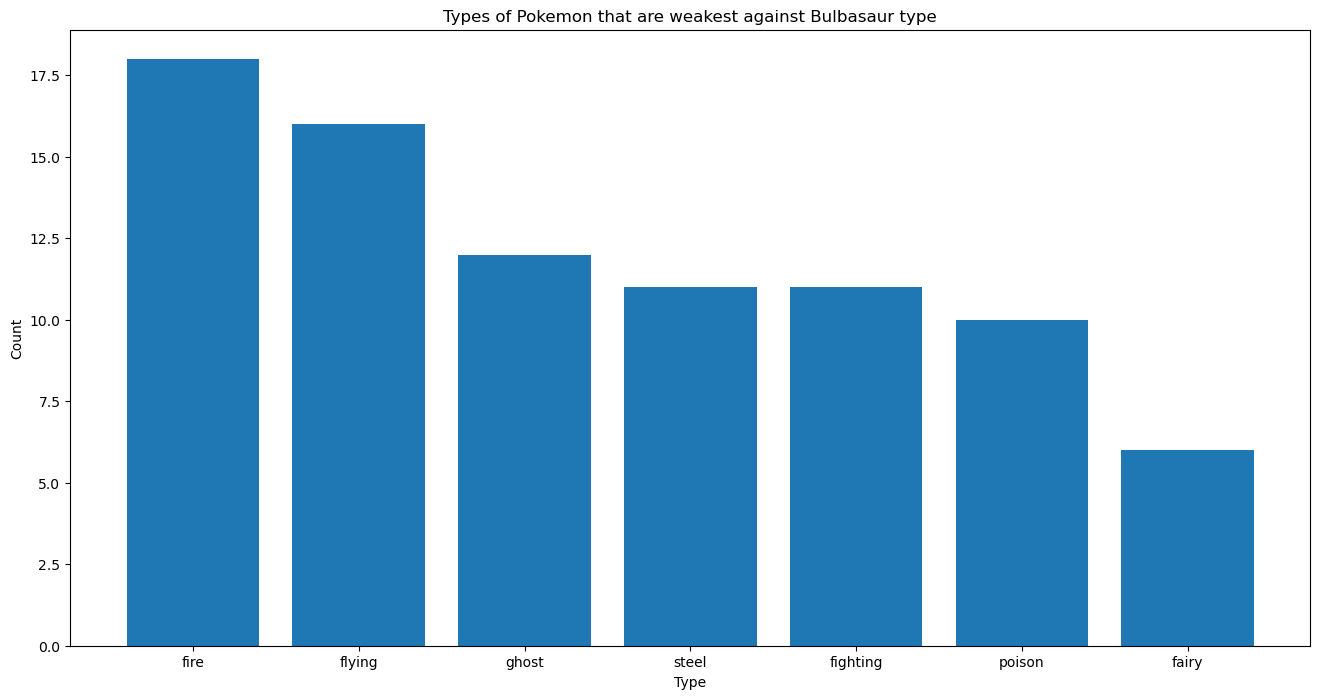

In [8]:
rep_type = input("Enter the opponent pokemon type: ")
if rep_type == 'bug':
    data['against_bug'] = data['against_bug']
if rep_type == 'dark':
    data['against_bug'] = data['against_dark']
if rep_type == 'dragon':
    data['against_bug'] = data['against_dragon']
if rep_type == 'electric':
    data['against_bug'] = data['against_electric']
if rep_type == 'fairy':
    data['against_bug'] = data['against_fairy']
if rep_type == 'fight':
    data['against_bug'] = data['against_fight']
if rep_type == 'fire':
    data['against_bug'] = data['against_fire']
if rep_type == 'flying':
    data['against_bug'] = data['against_flying']
if rep_type == 'ghost':
    data['against_bug'] = data['against_ghost']
if rep_type == 'grass':
    data['against_bug'] = data['against_grass']
if rep_type == 'ground':
    data['against_bug'] = data['against_ground']
if rep_type == 'ice':
    data['against_bug'] = data['against_ice']
if rep_type == 'normal':
    data['against_bug'] = data['against_normal']
if rep_type == 'poison':
    data['against_bug'] = data['against_poison']
if rep_type == 'psychic':
    data['against_bug'] = data['against_psychic']
if rep_type == 'rock':
    data['against_bug'] = data['against_rock']
if rep_type == 'steel':
    data['against_bug'] = data['against_steel']
if rep_type == 'water':
    data['against_bug'] = data['against_water']
if rep_type == 'general':
    data['against_bug'] = data['attack']

highest = data.loc[data['against_bug'] == data['against_bug'].max()]
lowest = data.loc[data['against_bug'] == data['against_bug'].min()]

print('Pokemon that is strongest against ' + rep_type + ' type')
if not highest.empty:
    print(tabulate(highest[['name', 'against_bug', 'type1', 'type2']], headers='keys', tablefmt='psql'))
else:
    print('No Pokemon found with the highest ' + rep_type + ' value')

print('Pokemon that is weakest against ' + rep_type + ' type')
if not lowest.empty:
    print(tabulate(lowest[['name', 'against_bug', 'type1', 'type2']], headers='keys', tablefmt='psql'))
else:
    print('No Pokemon found with the lowest against ' + rep_type + ' value')

if not highest.empty:
    type_counts_highest = pd.concat([highest['type1'], highest['type2']]).value_counts()
    plt.figure(figsize=(16, 8))
    plt.bar(type_counts_highest.index, type_counts_highest.values)
    plt.title('Types of Pokemon that are strongest against ' + rep_type + ' type')
    plt.xlabel('Type')
    plt.ylabel('Count')
    plt.show()

if not lowest.empty:
    type_counts_lowest = pd.concat([lowest['type1'], lowest['type2']]).value_counts()
    plt.figure(figsize=(16, 8))
    plt.bar(type_counts_lowest.index, type_counts_lowest.values)
    plt.title('Types of Pokemon that are weakest against ' + rep_type + ' type')
    plt.xlabel('Type')
    plt.ylabel('Count')
    plt.show()


This code takes input of a Pokemon name and then looks up the Pokemon's type in a pandas DataFrame named `data`. If the Pokemon is found in the DataFrame, the code prints out the Pokemon's type and its strengths against certain types. 

Here are the steps that the code takes:

1. It prompts the user to enter the name of the Pokemon.
2. It searches the `data` DataFrame for a row with a `name` column that matches the input. If a match is found, the code continues; otherwise, it prints "Pokemon not found" and exits.
3. It retrieves the `type1` and `type2` values for the matched row. If the `type2` value is `NaN` (not a number), it is replaced with `None`.
4. It prints out the Pokemon's name, type, and optionally its second type (if it has one).
5. It checks the first type of the Pokemon and prints out its strongest matchups against certain types. If the type is not recognized, it prints out a default message.

Overall, the code looks like it is designed to provide some basic information about a Pokemon's type and strengths, based on data in the `data` DataFrame.

In [9]:
poke_name = input("Enter the name of the Pokemon: ")
poke_row = data.loc[data['name'] == poke_name]

if not poke_row.empty:
    poke_type1 = poke_row['type1'].values[0]
    poke_type2 = poke_row['type2'].values[0] if poke_row['type2'].notnull().values[0] else None
    
    print(poke_name + " is a " + poke_type1 + ("-" + poke_type2 if poke_type2 else "") + " type Pokemon")
    
    if poke_type1 == 'bug':
        print('This Pokemon is strongest against Grass, Dark, and Psychic types')
    elif poke_type1 == 'dark':
        print('This Pokemon is strongest against Ghost and Psychic types')
    elif poke_type1 == 'dragon':
        print('This Pokemon is strongest against Dragon types')
    elif poke_type1 == 'electric':
        print('This Pokemon is strongest against Flying and Water types')
    elif poke_type1 == 'Fairy':
        print('This Pokemon is strongest against Fighting, Dragon and Dark types')
    elif poke_type1 == 'fighting':
        print('This Pokemon is strongest against Dark, Ice, Normal and Rock, Steel types')
    elif poke_type1 == 'fire':
        print('This Pokemon is strongest against Bug, Grass, Ice and Steel types')
    elif poke_type1 == 'flying':
        print('This Pokemon is strongest against Bug, Fighting and Grass types')
    elif poke_type1 == 'ghost':
        print('This Pokemon is strongest against Ghost and Psychic types')
    elif poke_type1 == 'grass':
        print('This Pokemon is strongest against Ground, Rock and Water types')
    elif poke_type1 == 'ground':
        print('This Pokemon is strongest against Electric, Fire, Poison, Rock and Steel types')
    elif poke_type1 == 'ice':
        print('This Pokemon is strongest against Dragon, Flying, Grass and Ground types')
    elif poke_type1 == 'normal':
        print('This Pokemon is weak against most types')
    elif poke_type1 == 'poison':
        print('This Pokemon is strongest against Fairy and Grass types')
    elif poke_type1 == 'Psychic':
        print('This Pokemon is strongest against Fighting and Poison types')
    elif poke_type1 == 'rock':
        print('This Pokemon is strongest against Bug, Fire, Flying and Ice types')
    elif poke_type1 == 'steel':
        print('This Pokemon is strongest against Fairy, Ice and Rock types')
    elif poke_type1 == 'water':
        print('This Pokemon is strongest against Fire, Ground and Rock types')
    else:
        print('This Pokemon does not have any type matchup data')
else:
    print('Pokemon not found')

Enter the name of the Pokemon: Bulbasaur
Bulbasaur is a grass-poison type Pokemon
This Pokemon is strongest against Ground, Rock and Water types


This code creates a 2x2 grid of scatter plots using the seaborn library to visualize the relationship between the 'speed' attribute of the Pokemon and three other attributes: 'attack', 'defense', 'height_m', and 'weight_kg'. The `figsize` parameter sets the size of the figure in inches, and `sharey=True` ensures that all subplots share the same y-axis for easy comparison.

The first subplot shows the relationship between speed and attack, the second subplot shows the relationship between speed and defense, the third subplot shows the relationship between speed and height, and the fourth subplot shows the relationship between speed and weight. The `set_title()` method is used to set the title of each subplot, and the `suptitle()` method is used to set the title of the entire figure.

Once the figure and subplots are created, the `plt.show()` method is called to display the visualization.

C:\Users\suman\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\suman\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\suman\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\suman\anaconda\l

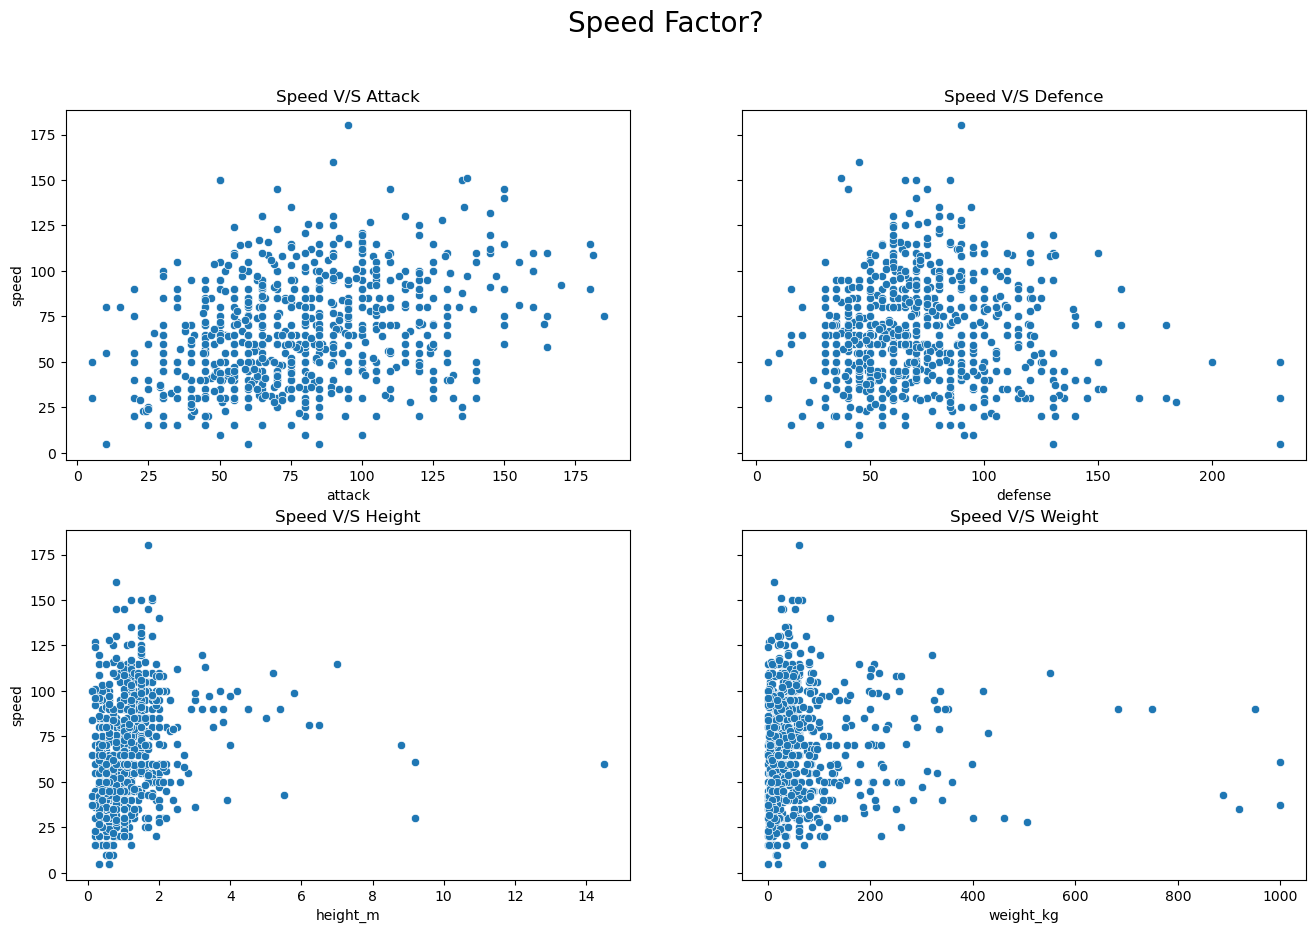

In [10]:
fig,axes = plt.subplots(2,2,figsize=(16,10),sharey=True)
sns.scatterplot(data['attack'],data['speed'],ax=axes[0,0])
axes[0,0].set_title("Speed V/S Attack")
sns.scatterplot(data['defense'],data['speed'],ax=axes[0,1])
axes[0,1].set_title("Speed V/S Defence")
sns.scatterplot(data['height_m'],data['speed'],ax=axes[1,0])
axes[1,0].set_title("Speed V/S Height")
sns.scatterplot(data['weight_kg'],data['speed'],ax=axes[1,1])
axes[1,1].set_title("Speed V/S Weight")
fig.suptitle("Speed Factor?", size=20)
plt.show()

This code creates a bar plot using Seaborn library to show the number of pokemons in each generation. 

Here's a breakdown of the code:

- `plt.figure(figsize=(12,6))`: This sets the figure size to 12 inches wide and 6 inches tall.
- `ax = sns.countplot(x='generation',data=data,order=data['generation'].value_counts().index,color='skyblue')`: This creates a count plot using the Seaborn `countplot()` function. The `x` parameter is set to 'generation' to specify the column from the `data` DataFrame to use for plotting. The `data` parameter specifies the DataFrame to use. The `order` parameter is set to the value counts of the 'generation' column, which sorts the bars in descending order. The `color` parameter is set to 'skyblue' to change the color of the bars.
- `ax.set_title('Pokemons per Generation')`: This sets the title of the plot to 'Pokemons per Generation'.
- `ax.set(xlabel='Generation',ylabel='Count')`: This sets the x-axis label to 'Generation' and the y-axis label to 'Count'.
- `for p in ax.patches: ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))`: This loops through each bar in the plot and adds a text annotation to the top of the bar displaying the count of pokemons in that generation.

Finally, `plt.show()` is called to display the plot.

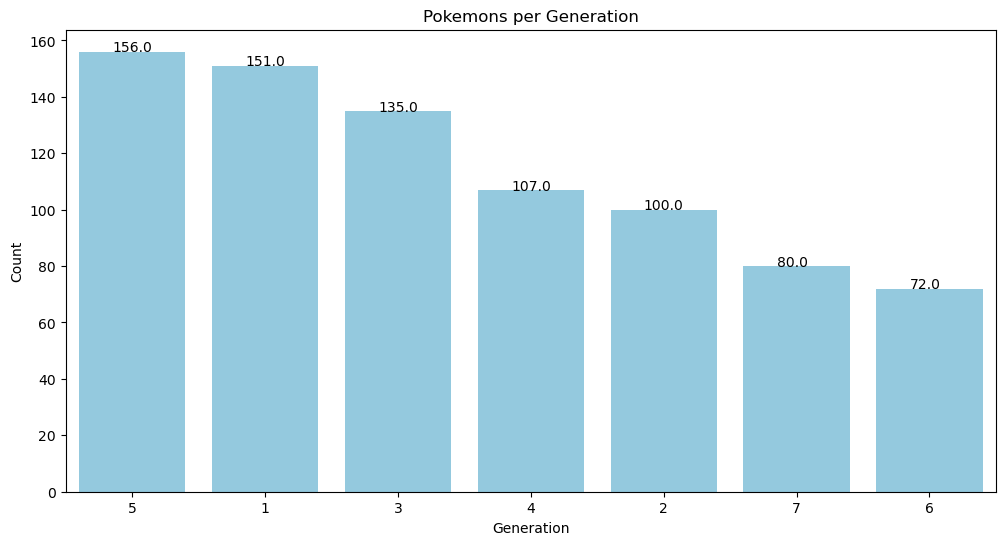

In [11]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x='generation',data=data,order=data['generation'].value_counts().index,color='skyblue')
ax.set_title('Pokemons per Generation')
ax.set(xlabel='Generation',ylabel='Count')
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

The code groups the Pokemon data by their primary type and generation, and counts the number of Pokemon in each group. Then, it renames the count column to `name_count` and displays the first 20 rows of the resulting DataFrame, transposed for readability.

In [12]:
primary_type_generation_group = data.groupby(['generation', 'type1'])['name'].count().to_frame().reset_index()
primary_type_generation_group.rename(columns={'name' : 'name_count'}, inplace=True)
primary_type_generation_group.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
generation,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2
type1,bug,dragon,electric,fairy,fighting,fire,ghost,grass,ground,ice,normal,poison,psychic,rock,water,bug,dark,electric,fairy,fighting
name_count,12,3,9,2,7,12,3,12,8,2,22,14,8,9,28,10,5,6,5,2


This code creates a dictionary `primary_type_generation_dict` where the keys are the string 'generation' followed by the number of the generation (extracted from the `primary_type_generation_group` dataframe) and the values are lists of the counts of each Pokemon primary type for that generation. The code then uses this dictionary to create a new dataframe `p_type_by_generation` with the primary types as rows and the generations as columns, where each cell represents the count of Pokemon of that primary type for that generation. 

Specifically, the code iterates over each unique generation in `primary_type_generation_group['generation']`, creates an empty list called `current_generation`, and then iterates over each unique primary type in `primary_type_generation_group['type1']`. For each combination of generation and primary type, the code tries to extract the count of Pokemon of that primary type for that generation from `primary_type_generation_group`. If there is no row in `primary_type_generation_group` with the specified combination of generation and primary type, the count is set to 0. The counts for each primary type for the current generation are appended to the `current_generation` list, and this list is then added as a value to `primary_type_generation_dict` with a key of the form 'generation n', where n is the current generation number. 

After iterating over all generations, `p_type_by_generation` is created using `pd.DataFrame()` with the `primary_type_generation_dict` dictionary as the data argument, and `primary_type_generation_group['type1'].unique()` as the index argument. This creates a dataframe where the rows are the unique primary types and the columns are the different generations. The values in each cell represent the count of Pokemon of that primary type for that generation.

In [13]:
primary_type_generation_dict  = {}
for generation in list(primary_type_generation_group['generation'].unique()):
    current_generation = []
    for p_type in primary_type_generation_group['type1'].unique():
        try:
            current_generation.append(
                primary_type_generation_group.loc[(primary_type_generation_group['generation']==generation) 
                                        & (primary_type_generation_group['type1'] == p_type)]['name_count'].values[0])
        except IndexError:
            current_generation.append(0)
    primary_type_generation_dict[f'generation {generation}'] = current_generation

p_type_by_generation = pd.DataFrame(primary_type_generation_dict, index= primary_type_generation_group['type1'].unique())


The heatmap looks good! It's a great way to visualize the number of Pokemons belonging to each type and generation. However, it might be easier to read if the color bar is shown on the side instead of the top. You can achieve this by setting the `cbar_kws` parameter to a dictionary with the `orientation` key set to `'vertical'`
This will move the color bar to the right side of the heatmap.

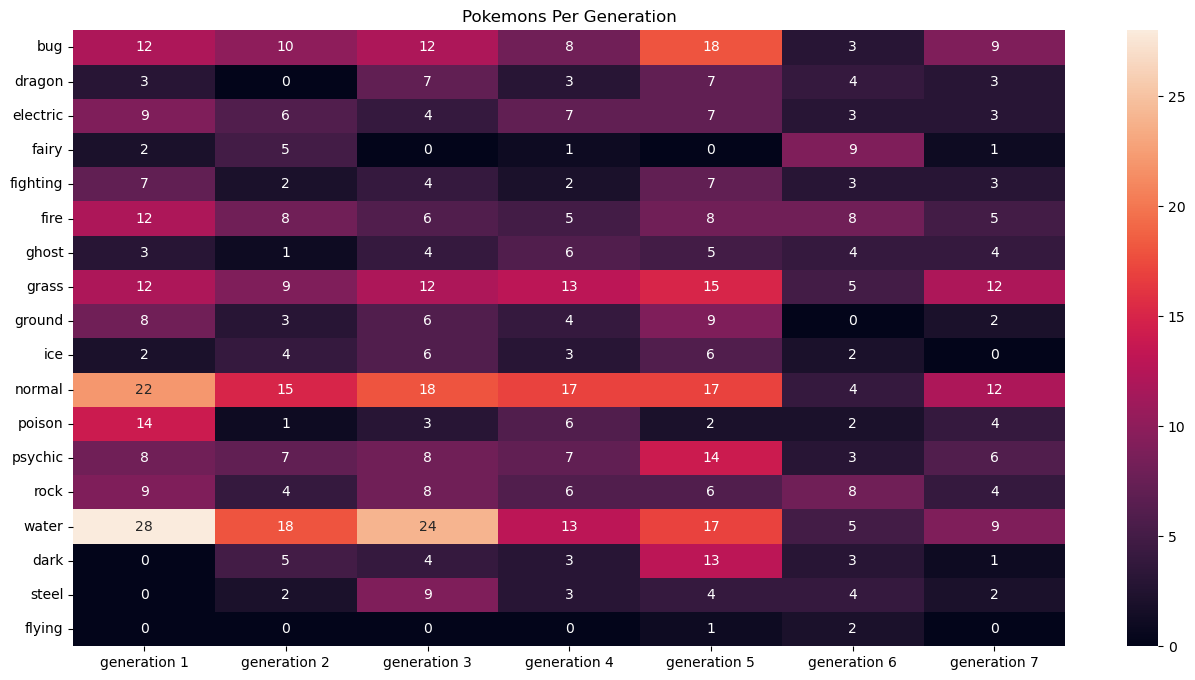

In [14]:
fig,axes = plt.subplots(figsize=(16,8))
sns.heatmap(p_type_by_generation,annot=True).set_title('Pokemons Per Generation')
plt.show()

This code generates a 2x2 subplot figure with four countplots showing the frequency of the top 5 primary and secondary types in the Pokemon dataset. The first row displays the most frequent types, while the second row displays the least frequent types.

The `sns.countplot()` function is used to create the countplots, with the `x` parameter specifying the variable to count and `data` parameter indicating the dataframe to use. The `order` parameter is used to order the x-axis categories based on their frequency, with the `iloc` method used to select the top 5 most frequent or least frequent categories. The `ax` parameter is used to specify the subplot to which each countplot should be plotted.

The `set_title()` method is used to add a title to each subplot, while the `annotate()` function is used to add text labels displaying the count for each bar in the countplot. The `figsize` parameter is used to set the size of the entire figure.

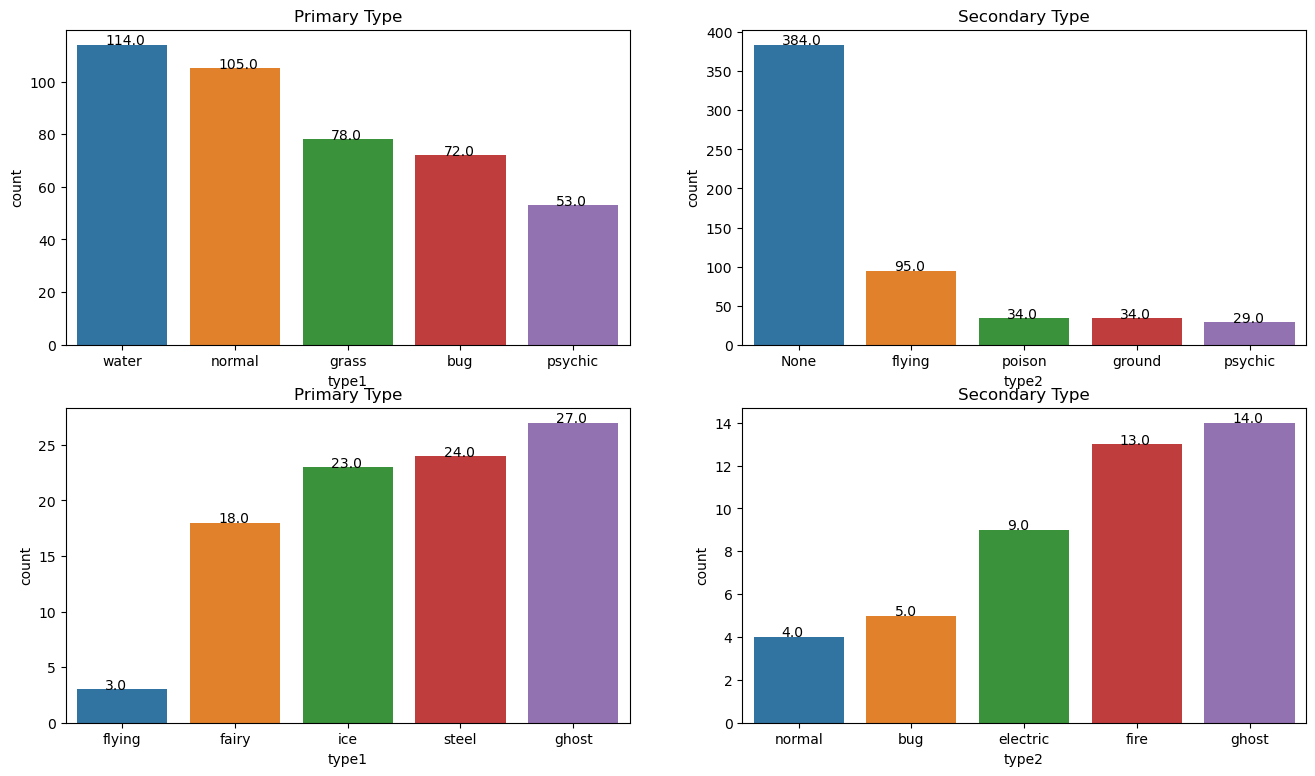

In [15]:
fig,axes = plt.subplots(2,2,figsize=(16,9))
ax = sns.countplot(x='type1',data=data,order=data['type1'].value_counts().iloc[:5].index, ax=axes[0,0])
ax.set_title('Primary Type')
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

ax = sns.countplot(x='type2',data=data,order=data['type2'].value_counts().iloc[:5].index, ax=axes[0,1])
ax.set_title('Secondary Type')
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

ax = sns.countplot(x='type1',data=data,order=data['type1'].value_counts(ascending=True).index[:5], ax=axes[1,0])
ax.set_title('Primary Type')
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

ax = sns.countplot(x='type2',data=data,order=data['type2'].value_counts(ascending=True).index[:5], ax=axes[1,1])
ax.set_title('Secondary Type')
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

These scatterplots show the relationship between the height of a Pokemon and its various stats. The first plot shows the relationship between height and speed, the second between height and attack, the third between height and defense, and the fourth between height and base_total (a combined measure of a Pokemon's stats).

What can be observed is that there is no clear pattern between height and any of the stats. There are tall Pokemon with high and low values for each of the stats, and the same goes for short Pokemon. However, there seems to be a slight trend for Pokemon with higher base_total to be slightly taller on average, as seen in the fourth plot.

C:\Users\suman\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\suman\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\suman\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\suman\anaconda\l

<AxesSubplot:xlabel='base_total', ylabel='height_m'>

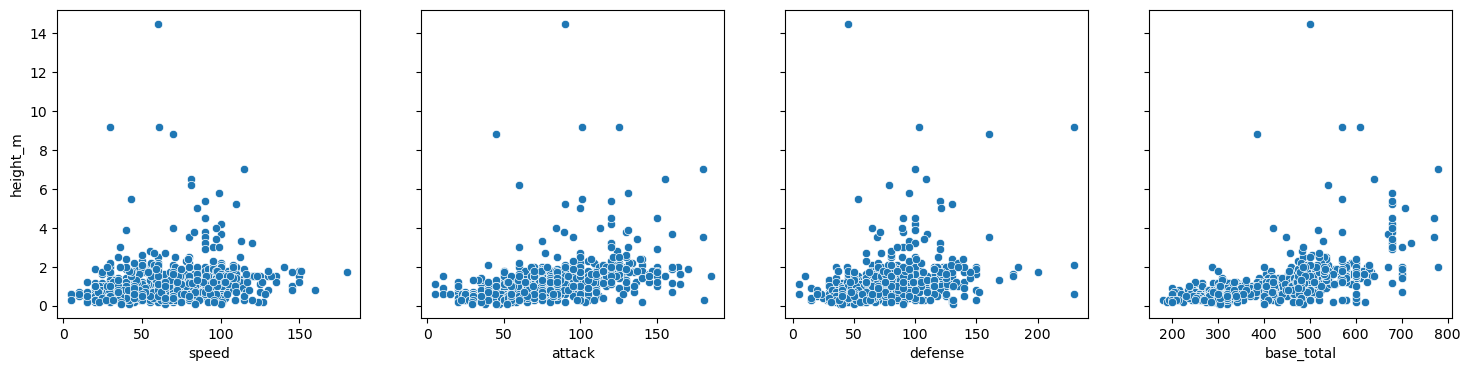

In [16]:
f, axes = plt.subplots(1,4,figsize=(18,4),sharey=True)

sns.scatterplot(data['speed'],data['height_m'],ax=axes[0])
sns.scatterplot(data['attack'],data['height_m'],ax=axes[1])
sns.scatterplot(data['defense'],data['height_m'],ax=axes[2])
sns.scatterplot(data['base_total'],data['height_m'],ax=axes[3])

These are scatterplots showing the relationships between the speed, attack, defense, and base total stats of Pokémon and their weight in kilograms. Each subplot represents a different stat, with weight on the y-axis and the stat on the x-axis. The scatterplot shows the distribution of data points, where each point represents a Pokémon's value for the corresponding x and y variables. 

The plots suggest that there are some weak positive correlations between speed and weight, as well as between attack and weight. However, there doesn't seem to be a clear relationship between defense or base total stats and weight.

C:\Users\suman\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\suman\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\suman\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\suman\anaconda\l

<AxesSubplot:xlabel='base_total', ylabel='weight_kg'>

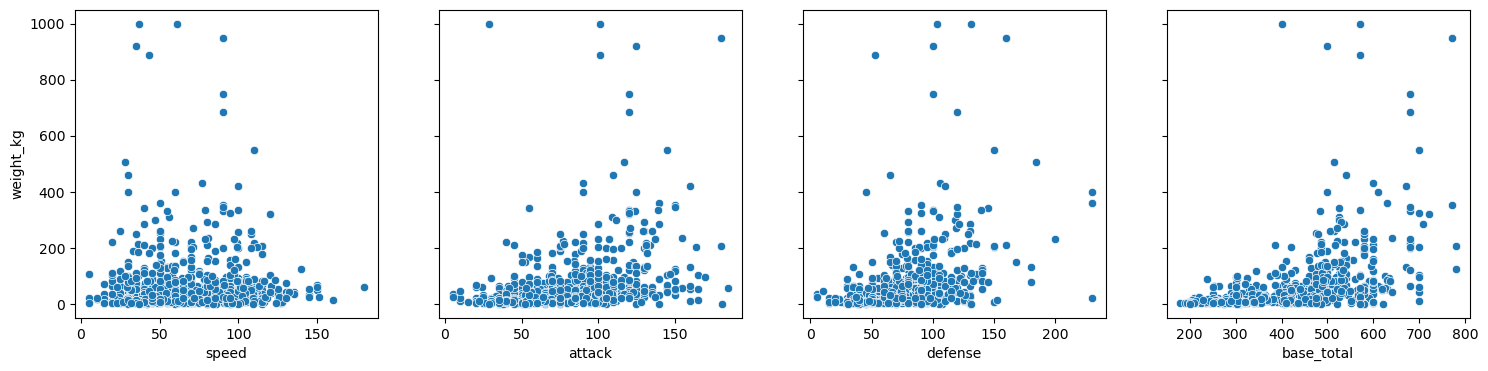

In [17]:
f, axes = plt.subplots(1,4,figsize=(18,4),sharey=True)
sns.scatterplot(data['speed'],data['weight_kg'],ax=axes[0])
sns.scatterplot(data['attack'],data['weight_kg'],ax=axes[1])
sns.scatterplot(data['defense'],data['weight_kg'],ax=axes[2])
sns.scatterplot(data['base_total'],data['weight_kg'],ax=axes[3])

This code creates a new dataframe called `legend` that contains the columns `name`, `type1`, and `type2` for all rows in the original `data` dataframe where the `is_legendary` column equals 1 (meaning the Pokemon is classified as a legendary). This new dataframe `legend` will only include information about legendary Pokemon.

In [18]:
legend = data[data['is_legendary']==1][['name','type1','type2']]
legend.head()

,name,type1,type2
143,Articuno,ice,flying
144,Zapdos,electric,flying
145,Moltres,fire,flying
149,Mewtwo,psychic,None
150,Mew,psychic,None


This code is creating a bar chart of the top primary and secondary types of legendary Pokemon, as well as the most common combined types (i.e., including both primary and secondary types). 

First, the code filters the original `data` DataFrame to include only legendary Pokemon, and selects the columns containing the Pokemon's name, primary type (`type1`), and secondary type (`type2`). It then creates two lists, `s` and `c`, containing the secondary types and combined types (respectively) of these legendary Pokemon. These lists are then used to create two dictionaries, `count_s` and `count_c`, that count the number of occurrences of each secondary type and combined type, respectively. These dictionaries are sorted in descending order by value (i.e., the number of occurrences) and converted back into lists, `count_s` and `count_c`.

The resulting lists `count_s` and `count_c` contain tuples of type-count pairs, with the most common types appearing first. The code then creates a figure with three subplots using `plt.subplots(1,3,figsize=(18,4))`. The first subplot is a countplot that shows the top five primary types of legendary Pokemon using `sns.countplot(x='type1',data=legend,order=legend['type1'].value_counts().iloc[:5].index, ax=axes[0])`. The for loop with `for p in ax.patches` adds annotations to the bars indicating the count of Pokemon for each type.

The second subplot is a barplot that shows the top five secondary types of legendary Pokemon using `sns.barplot(x=k_s[:5],y=v_s[:5], ax=axes[1])`. The for loop with `for p in ax.patches` adds annotations to the bars indicating the count of Pokemon for each type.

The third subplot is a barplot that shows the top eight combined types of legendary Pokemon using `sns.barplot(x=k_c[:8],y=v_c[:8], ax=axes[2])`. The `plt.xticks()` function is used to rotate the x-axis labels by 90 degrees so that they are readable. The for loop with `for p in ax.patches` adds annotations to the bars indicating the count of Pokemon for each type.

Overall, this code provides insights into the types of legendary Pokemon and how they are distributed among primary, secondary, and combined types.

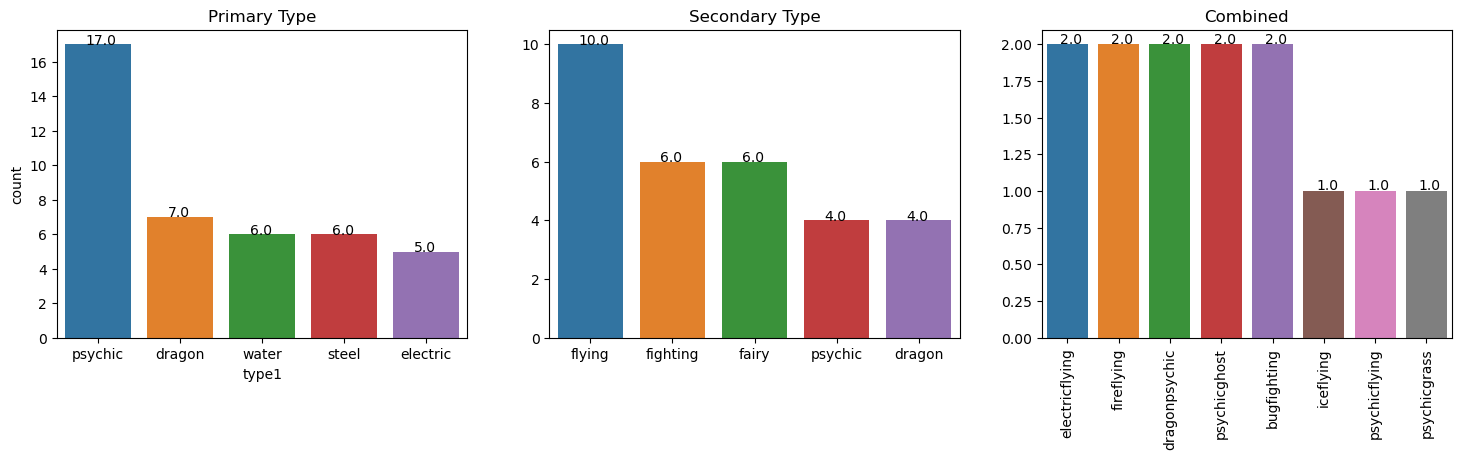

In [19]:
s = []
secondary = legend['type2']
for i in secondary:
    if 'None' in i: 
        pass
    else:
        s.append(i)
count_s = Counter(s)        
c=[]
combined = legend['type1'] + legend['type2']
for i in combined:
    if 'None' in i: 
        pass
    else:
        c.append(i)
count_c = Counter(c)

count_s = sorted(count_s.items(), key=lambda x: x[1],reverse=True)
count_c = sorted(count_c.items(), key=lambda x: x[1],reverse=True)  

fig,axes = plt.subplots(1,3,figsize=(18,4))
ax = sns.countplot(x='type1',data=legend,order=legend['type1'].value_counts().iloc[:5].index, ax=axes[0])
ax.set_title('Primary Type')
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

v_s,k_s=[],[]
v_c,k_c=[],[]
for i in count_s:
    k_s.append(i[0])
    v_s.append(i[1])
for i in count_c:
    k_c.append(i[0])
    v_c.append(i[1])

ax = sns.barplot(x=k_s[:5],y=v_s[:5], ax=axes[1])
ax.set_title('Secondary Type')
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
    
ax = sns.barplot(x=k_c[:8],y=v_c[:8], ax=axes[2])
ax.set_title('Combined')
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))


This code creates a horizontal bar plot using Seaborn library to display the top 10 pokemon based on their "base_total" attribute. 

The data used for this visualization is sorted in descending order based on the "base_total" attribute and only the top 10 rows are selected using the Pandas' `reset_index()` method.

Then, a horizontal bar plot is created using Seaborn's `barplot()` function with "name" attribute on x-axis and "base_total" attribute on y-axis. 

The `ax.annotate()` method is used to add the values on top of each bar.

The title of the plot is "Which is the best pokémon?" and the x and y axis are labeled as "Base Total" and "Name" respectively. 

The `figsize` parameter of the `plt.figure()` function is used to set the size of the plot.

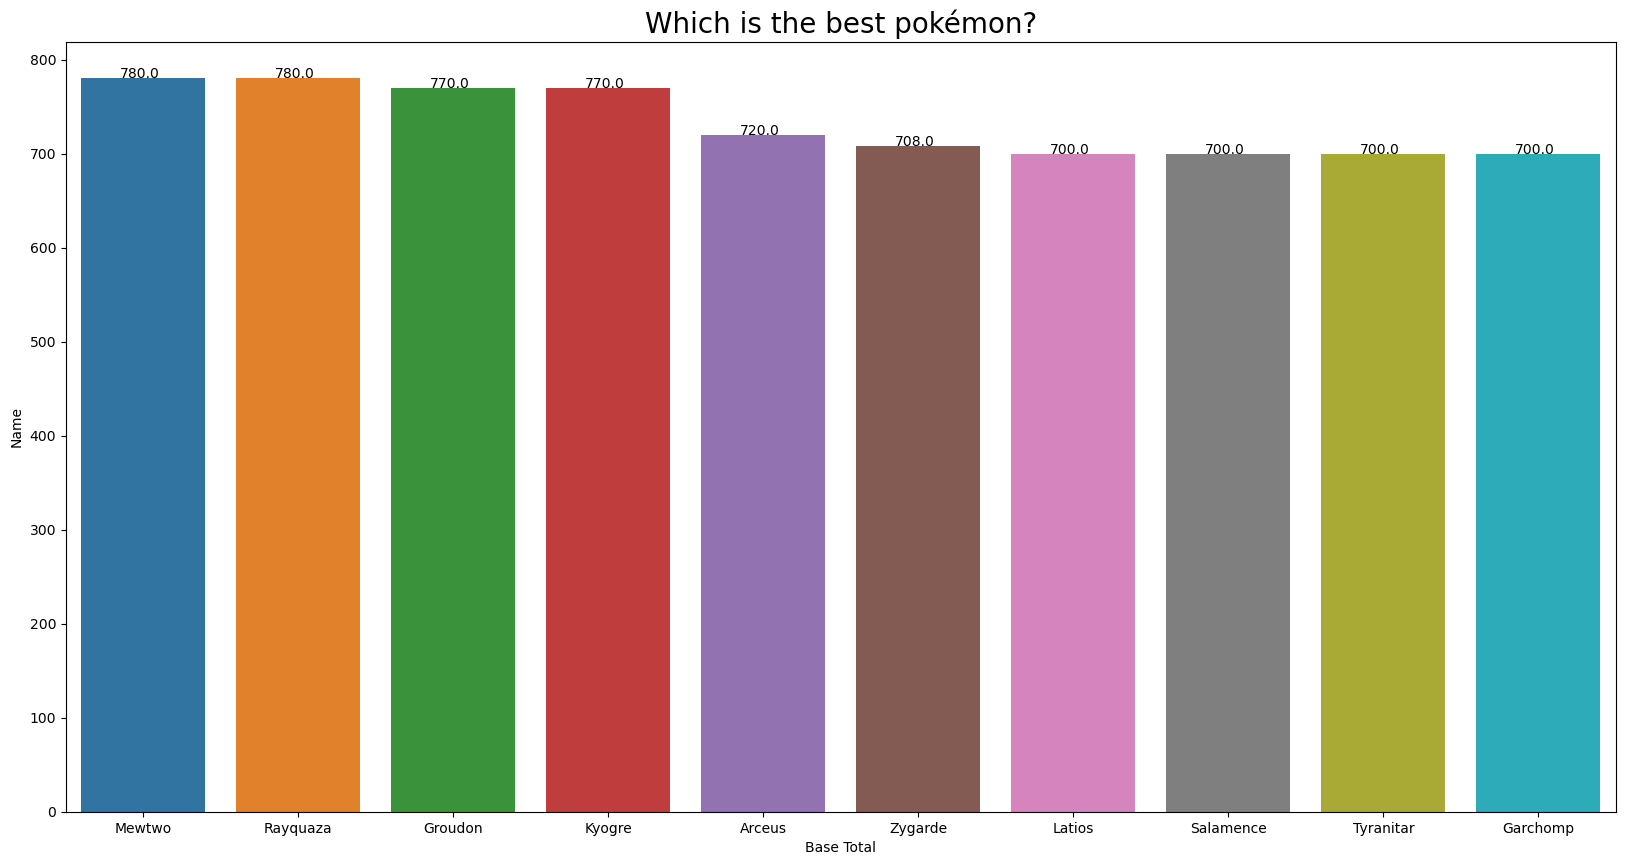

In [20]:
top10_pokemon_base_total = data.sort_values(by="base_total", ascending=False).reset_index()[:10]
plt.figure(figsize=(20,10))
ax = sns.barplot(x=top10_pokemon_base_total["name"], y=top10_pokemon_base_total["base_total"], orient='v')
ax.set_title("Which is the best pokémon?", size=20)
ax.set(xlabel="Base Total", ylabel="Name")
for p in ax.patches:
    ax.annotate('{:.1f}'.format( p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))


This code generates a radar chart to compare the attributes of the three top-rated Pokemons in the dataset, namely Mewtwo, Rayquaza, and Arceus. The attributes selected for comparison are attack, special attack, defense, special defense, hp, and speed. 

First, the code extracts the attribute values of each Pokemon from the `top10_pokemon_base_total` dataframe and creates a list for each Pokemon containing its attribute values. 

Then, it sets up the angles for the radar chart and adds the first angle at the end of the list to complete the full circle. It also appends the first attribute to the end of the `attributes` list to complete the labels for the radar chart.

Finally, it creates a polar subplot and plots the attribute values for each Pokemon on the radar chart. It also fills the area under each line to create a shaded area for each Pokemon. It sets the `thetagrids` to show the attribute labels on the perimeter of the radar chart and adds a title and legend to the chart.

Text(0.5, 1.0, 'Mewtwo & Rayquaza V/S God of Pokemons')

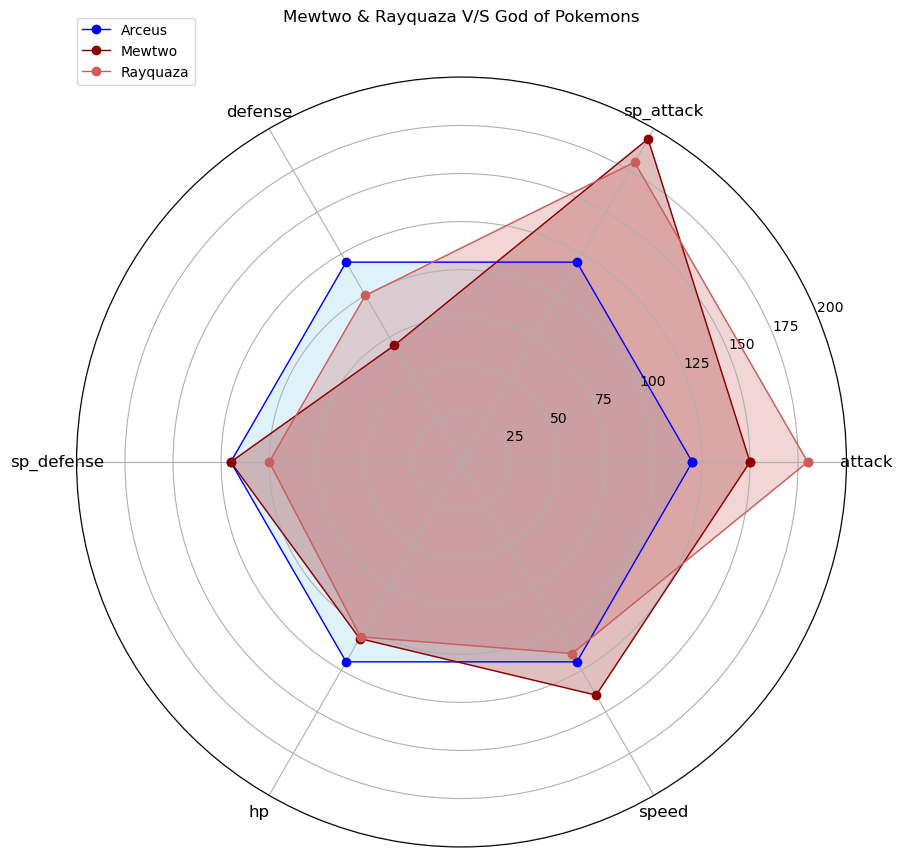

In [21]:
attributes=['attack', 'sp_attack', 'defense', 'sp_defense', 'hp', 'speed']

mewtwo= top10_pokemon_base_total[top10_pokemon_base_total['name'] == 'Mewtwo'][attributes].values.tolist()[0]
rayquaza = top10_pokemon_base_total[top10_pokemon_base_total['name'] == 'Rayquaza'][attributes].values.tolist()[0]
Arceus = top10_pokemon_base_total[top10_pokemon_base_total['name'] == 'Arceus'][attributes].values.tolist()[0]

angles=np.linspace(0,2*np.pi,len(attributes), endpoint=False)
angles=np.concatenate((angles,[angles[0]]))

attributes.append(attributes[0])
mewtwo.append(mewtwo[0])
rayquaza.append(rayquaza[0])
Arceus.append(Arceus[0])
fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(111, polar=True)
ax.plot(angles,Arceus, 'o-', color='blue', linewidth=1, label='Rayquaza')
ax.fill(angles, Arceus, alpha=0.25, color='skyblue')
ax.plot(angles, mewtwo, 'o-', color='darkred', linewidth=1, label='Mewtwo')
ax.fill(angles, mewtwo, alpha=0.25, color='darkred')
ax.plot(angles,rayquaza, 'o-', color='indianred', linewidth=1, label='Arceus')
ax.fill(angles, rayquaza, alpha=0.25, color='indianred')

ax.set_thetagrids(angles[:-1] * 180/np.pi, attributes[:-1], fontsize=12)
plt.grid(True)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Arceus', 'Mewtwo', 'Rayquaza'], loc=(0,0.99))

ax.set_title("Mewtwo & Rayquaza V/S God of Pokemons", pad=40)

This code creates a radar chart using the Python library Matplotlib. A radar chart is a graphical way of comparing multiple variables for multiple items. In this case, the variables are attributes of Pokemon (attack, sp_attack, defense, sp_defense, hp, speed), and the items are a user-specified number of Pokemon names.

The code begins by asking the user to input the number of Pokemon they want to compare. Then, in a loop that runs `num_pokemon` times, it asks the user to input the name of each Pokemon they want to compare. For each Pokemon, the code extracts the values of its attributes from a Pandas DataFrame called `data`, using the `.values.tolist()` method. The `.append()` method is then used to duplicate the first attribute value at the end of the list, to make sure the chart plots the attribute values in a complete circle.

Next, the code sets up the plotting area by creating an array of angles, one for each attribute. It also creates a `Figure` object with a size of 20x12 inches, and an `Axes` object with polar coordinates. The `for` loop then plots each Pokemon's data as a line with markers and fills in the area beneath the line with a semi-transparent color. The color of each line is determined by the `colors` list.

After plotting all the Pokemon, the code adds gridlines and labels to the chart, and a legend showing the names of the Pokemon. Finally, it sets the title of the chart to "Radar Chart" with a padding of 40 points, and displays the chart using `plt.show()`.

Enter the number of pokemons you want to compare: 3
Enter name of Pokemon 1: Bulbasaur
Enter name of Pokemon 2: Ivysaur
Enter name of Pokemon 3: Venusaur


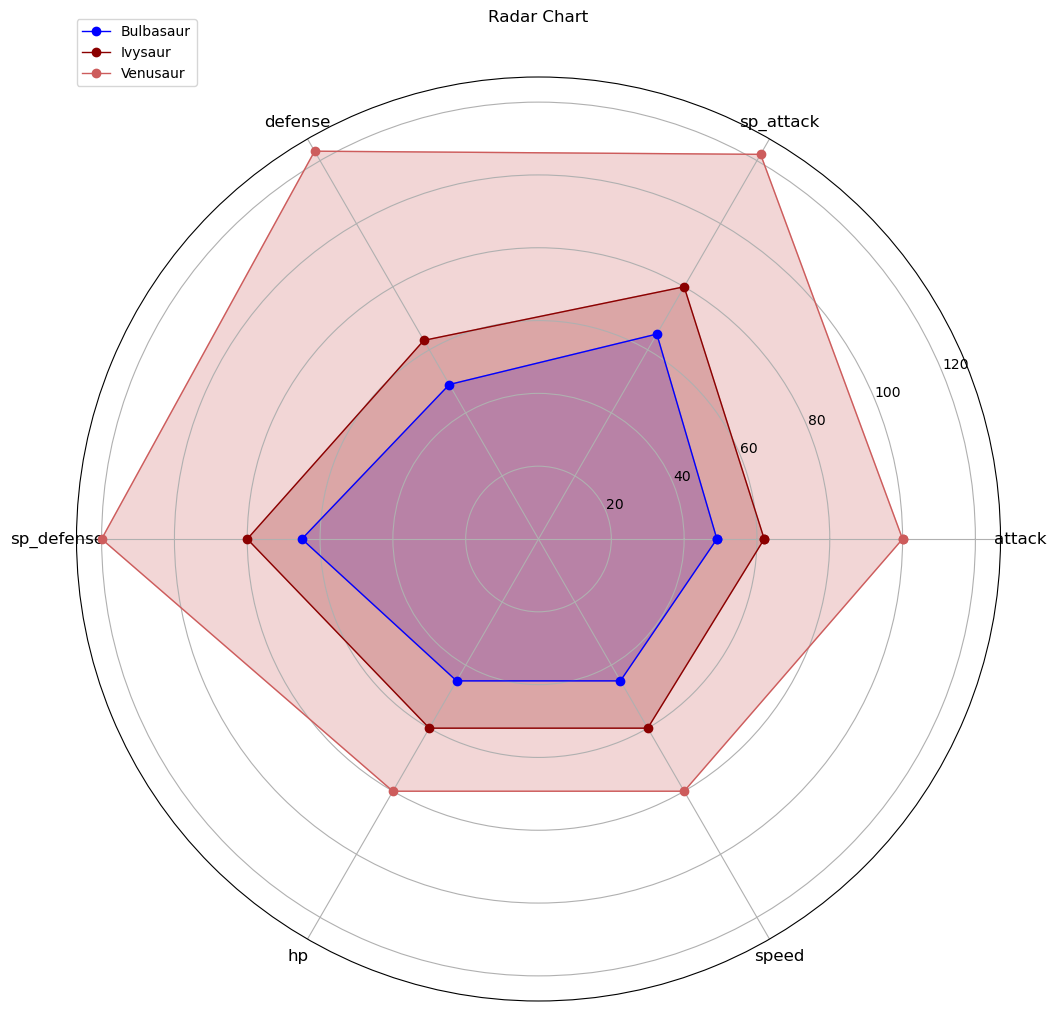

In [22]:
attributes=['attack', 'sp_attack', 'defense', 'sp_defense', 'hp', 'speed']

num_pokemon = int(input("Enter the number of pokemons you want to compare: "))

pokemon_data = []
pokemon_names = []
colors = ['blue', 'darkred', 'indianred']
for i in range(num_pokemon):
    pokemon_name = input(f"Enter name of Pokemon {i+1}: ")
    pokemon_names.append(pokemon_name)
    pokemon_attributes = data[data['name'] == pokemon_name][attributes].values.tolist()[0]
    pokemon_attributes.append(pokemon_attributes[0])
    pokemon_data.append(pokemon_attributes)

angles=np.linspace(0,2*np.pi,len(attributes), endpoint=False)
angles=np.concatenate((angles,[angles[0]]))

fig=plt.figure(figsize=(20,12))
ax=fig.add_subplot(111, polar=True)
for i in range(num_pokemon):
    pokemon = pokemon_data[i]
    name = pokemon_names[i]
    color = colors[i]
    
    ax.plot(angles, pokemon, 'o-', color=color, linewidth=1, label=name)
    ax.fill(angles, pokemon, alpha=0.25, color=color)

ax.set_thetagrids(angles[:-1] * 180/np.pi, attributes, fontsize=12)
plt.grid(True)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc=(0,0.99))

ax.set_title("Radar Chart", pad=40) 

plt.show()
